In [1]:
import sys
sys.path.append("..")
from nodegamlss.sklearn import NodeGAMLSS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Generate dataset
N = 10000
x1 = np.random.uniform(-5, 5, size=N)
x2 = np.random.uniform(-5, 5, size=N)
x3 = np.random.uniform(-5, 5, size=N)

f1 = lambda x: (x) ** 2 - 8
f2 = lambda x: x * 2
f3 = lambda x: np.sin(x)

y = f1(x1) + f2(x2) + f3(x3) + np.random.standard_normal(N)
y = y/y.max()
X = pd.DataFrame(np.vstack([x1, x2, x3]).T)


model = NodeGAMLSS(
    in_features=X.shape[1],
    objective="LSS",
    family="normal",
    device="cpu",
    verbose=False,
    problem="LSS",
    max_steps=500,
    lr=0.0001,
    num_trees=25,
    l2_lambda=0.0001
)


record = model.fit(X, y)


WARNING! The apex is not installed so fp16 is not available.


c:\Users\anton\anaconda3\envs\nodegam_venv\lib\site-packages\qhoptim\pyt\qhadam.py:133: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\python_arg_parser.cpp:1630.)
  exp_avg.mul_(beta1_adj).add_(1.0 - beta1_adj, d_p)


Steps	Train Err	Val Metric (LSS)
20	1.2087	1.7008
40	1.1344	1.6613
60	1.5071	1.6056
80	1.9691	1.5403
100	2.6123	1.4602
120	0.9511	1.321
140	1.0215	1.1807
160	0.8639	1.0569
180	0.6272	0.9508
200	0.7715	0.8661
220	1.2163	0.7989
240	1.0033	0.7408
260	0.6215	0.6901
280	1.1428	0.6465
300	0.6861	0.6111
320	0.3646	0.5712
340	0.6493	0.5497
360	0.4457	0.5318
380	0.8923	0.5164
400	0.82	0.5024
420	0.5914	0.4902
440	0.7283	0.4791
460	0.7755	0.4695
480	0.5768	0.4428
500	0.6312	0.4344
End. It reaches the maximum steps 500
Total training time: 24.4 seconds
Best step:  500
Best Val Metric:  0.43436557054519653
Load the best checkpoint.


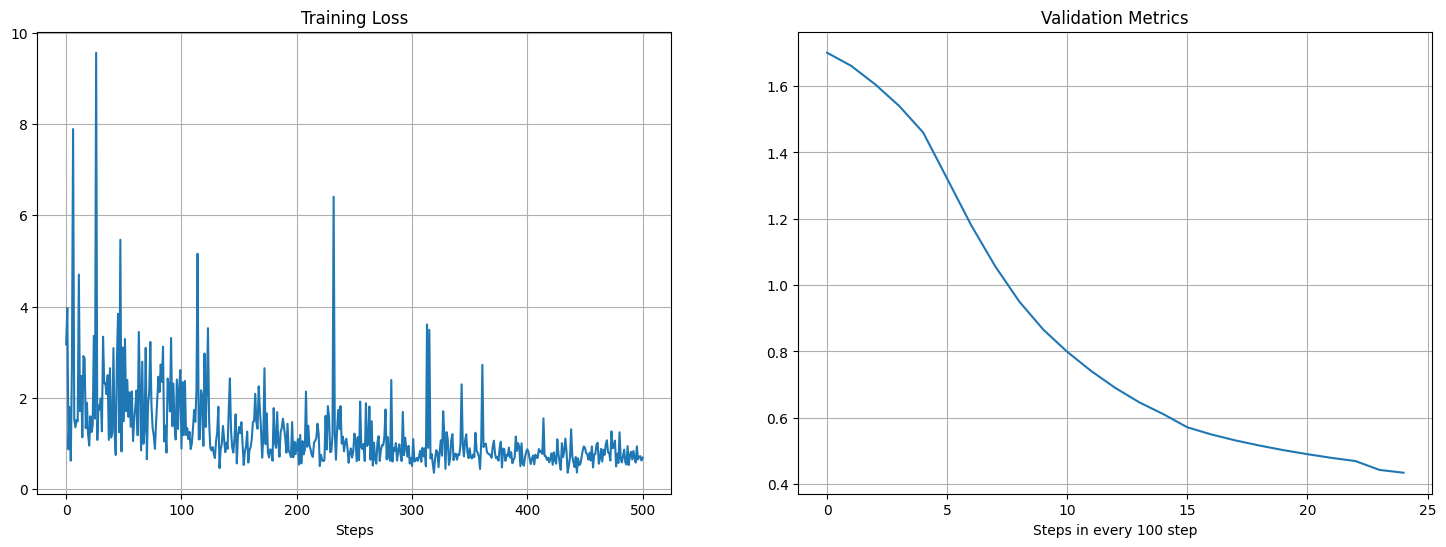

In [2]:
plt.figure(figsize=[18, 6])
plt.subplot(1, 2, 1)
plt.plot(record['train_losses'])
plt.title('Training Loss')
plt.xlabel('Steps')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(record['val_metrics'])
plt.title('Validation Metrics')
plt.xlabel('Steps in every 100 step')
plt.grid()
plt.show()

In [3]:
model = NodeGAMLSS(
    in_features=3,
    objective="mse",
    family="normal",
    device="cpu",
    verbose=False,
    problem="LSS",
    max_steps=300,
    lr=0.0001,
    num_trees=25,
    l2_lambda=0.01
)


record = model.fit(X, y)

Steps	Train Err	Val Metric (mse)
20	1.8547	0.2507
40	1.1322	0.2454
60	0.9961	0.2374
80	1.0483	0.2288
100	0.6846	0.2193
120	0.7328	0.2038
140	0.802	0.1898
160	0.9139	0.1787
180	0.9789	0.1703
200	0.6151	0.1639
220	0.7018	0.1587
240	0.4101	0.1357
260	0.5866	0.1324
280	1.0616	0.1299
300	0.9812	0.1278
End. It reaches the maximum steps 300
Total training time: 14.5 seconds
Best step:  300
Best Val Metric:  0.12780173662751115
Load the best checkpoint.


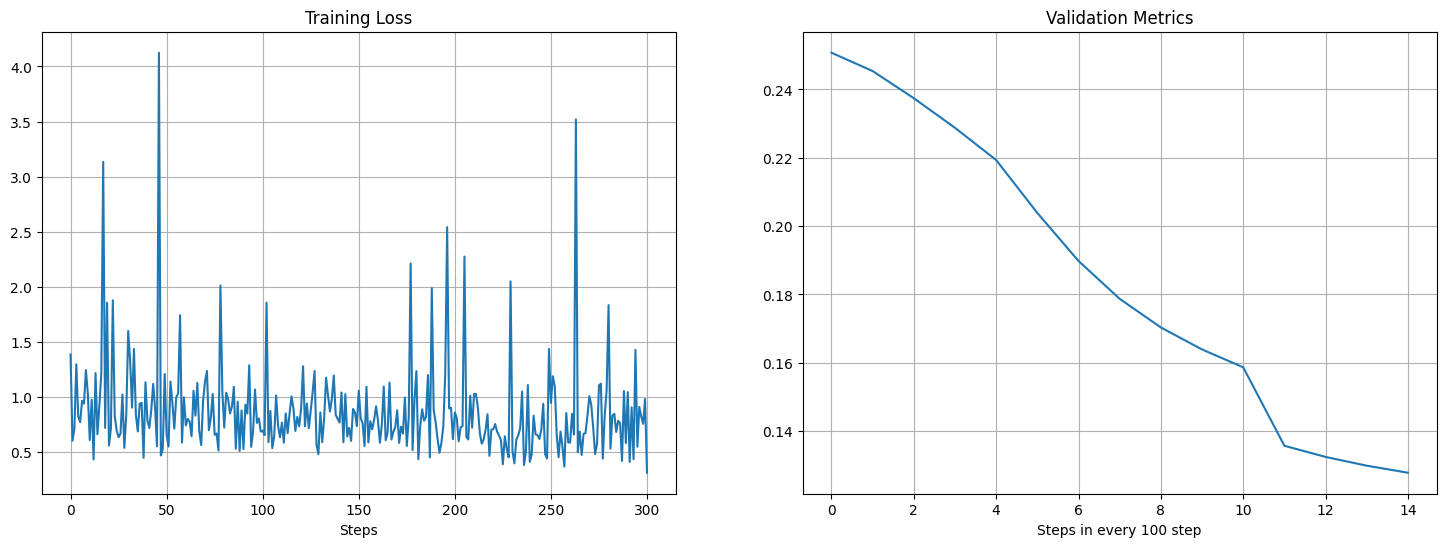

In [4]:
plt.figure(figsize=[18, 6])
plt.subplot(1, 2, 1)
plt.plot(record['train_losses'])
plt.title('Training Loss')
plt.xlabel('Steps')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(record['val_metrics'])
plt.title('Validation Metrics')
plt.xlabel('Steps in every 100 step')
plt.grid()
plt.show()